<a href="https://colab.research.google.com/github/aarushM923/remote-collab-tool/blob/main/Copy_of_Real_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'10 17.gdoc'
'10 3.gdoc'
'1 17.gdoc'
'2020-12-11 20-13.pdf'
'2021-06-04 20-40.pdf'
'2024 Resume - Eshita Maheshwari (1).pdf'
'2024 Resume NEW.gdoc'
'4 25.gdoc'
'9 19.gdoc'
 93666d67-cd21-4583-958c-6349fae22047.webm
'9th grade Summer Reading (1).gdoc'
'9th grade Summer Reading.gdoc'
'Aarush Diffuser .gslides'
'Aarush Maheshwari New Resume.gdoc'
"Aarush M's Certification Video"
'Aarush M'\''s Certification Video (1)'
'ACSL tiles is a one-person game played with rectangular tiles.gdoc'
'After the Great Recession in the late 2000s, we learned that when banks undergo disorderly conduct, the government has to step in and bail out banks.gdoc'
 ajsdik.gdoc
'anne mclaren.gdraw'
 AppScreen.html
'AUG 30.gdoc'
 aws.gdoc
'C33 NOTES APUSH.gdoc'
 Classroom
'Class schedule for junior year.pdf'
'Colab Notebooks'
 connect4_v1.gdoc
 connect4_v2.gdoc
'Copy of Copy of 2024 Resume

In [ ]:
import os

# Change the directory to the folder containing flower_images
os.chdir('/content/drive/My Drive/flower_images')

# List the contents of the folder
print(os.listdir())

['.DS_Store', 'Orchid', 'Lilly', 'Sunflower', 'Tulip', 'Lotus']


In [ ]:
import os
count = 0
# List all directories in the 'flower_images' folder
dirs = os.listdir('/content/drive/My Drive/flower_images')

# Loop through each directory
for dir in dirs:
    dir_path = os.path.join('/content/drive/My Drive/flower_images', dir)

    # Check if the current path is a directory
    if os.path.isdir(dir_path):
        # List all files in the subdirectory
        files = os.listdir(dir_path)

        # Count the number of image files
        image_count = len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

        # Print the directory name and the number of images
        print(f"{dir}; folder has {image_count} images")
        count = count + len(files)

print(count)

Orchid; folder has 1000 images
Lilly; folder has 999 images
Sunflower; folder has 1020 images
Tulip; folder has 1000 images
Lotus; folder has 1000 images
5021


In [ ]:
base_dir = '/content/drive/My Drive/flower_images/'
img_size = 100
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size, img_size)

)
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size, img_size)

)

Found 5019 files belonging to 5 classes.
Using 4016 files for training.
Found 5019 files belonging to 5 classes.
Using 1003 files for validation.


In [ ]:
flower_names = train_ds.class_names
flower_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [ ]:
import matplotlib.pyplot as plt

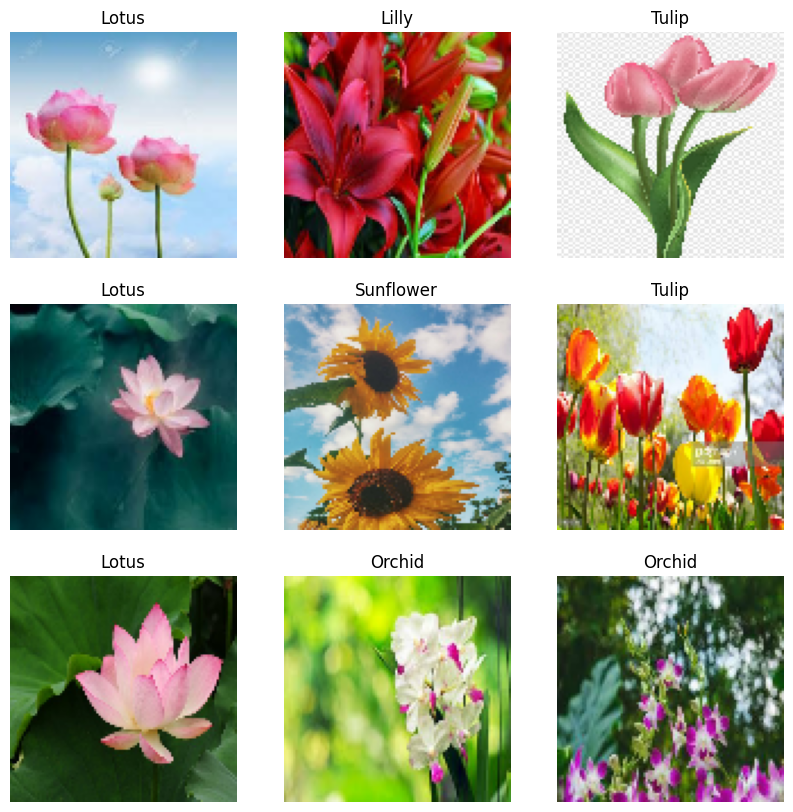

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(flower_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#data augmentation

In [ ]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

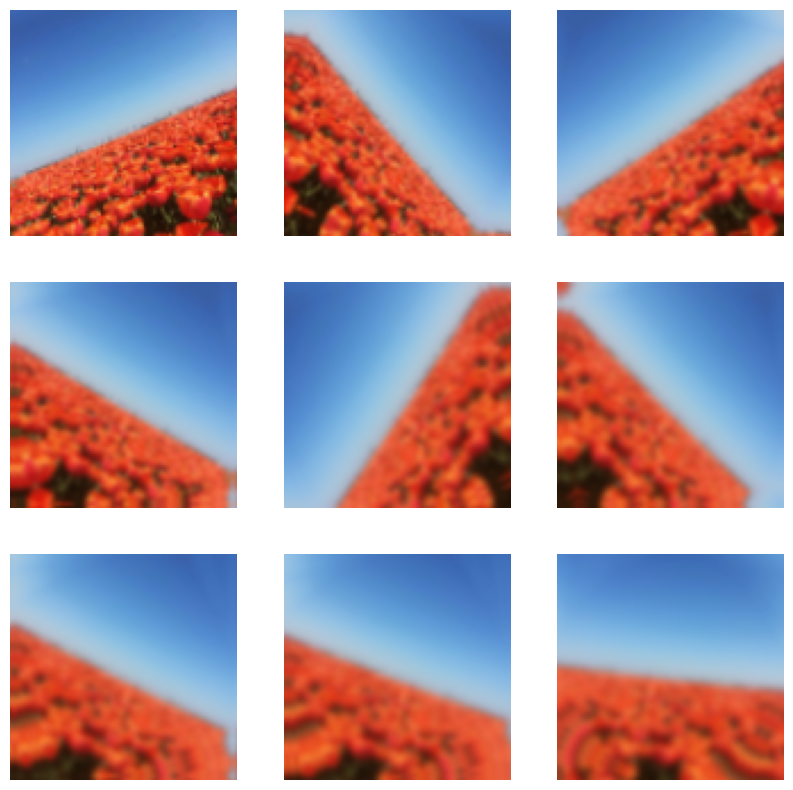

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    images = data_augmentation(images)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#model creation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                 

In [ ]:
history = model.fit(
    train_ds,
    epochs = 15,
    validation_data = val_ds
)

Epoch 1/15
126/126 [==============================] - 156s 1s/step - loss: 1.2366 - accuracy: 0.4786 - val_loss: 1.1569 - val_accuracy: 0.5284
Epoch 2/15
126/126 [==============================] - 47s 372ms/step - loss: 1.0482 - accuracy: 0.5799 - val_loss: 1.0155 - val_accuracy: 0.5683
Epoch 3/15
126/126 [==============================] - 47s 374ms/step - loss: 0.9741 - accuracy: 0.6083 - val_loss: 1.0025 - val_accuracy: 0.6092
Epoch 4/15
126/126 [==============================] - 47s 371ms/step - loss: 0.8984 - accuracy: 0.6444 - val_loss: 1.0941 - val_accuracy: 0.5793
Epoch 5/15
126/126 [==============================] - 46s 365ms/step - loss: 0.8507 - accuracy: 0.6723 - val_loss: 0.9583 - val_accuracy: 0.6271
Epoch 6/15
126/126 [==============================] - 45s 358ms/step - loss: 0.8011 - accuracy: 0.6838 - val_loss: 0.8217 - val_accuracy: 0.6919
Epoch 7/15
126/126 [==============================] - 45s 361ms/step - loss: 0.7622 - accuracy: 0.7012 - val_loss: 0.8128 - val_accu

In [ ]:
directory = '/content/drive/MyDrive/flower_images/Tulip'
files = os.listdir(directory)
print(files)

['5c163730bb.jpg', '221e0b54b9.jpg', '34f9f102dc.jpg', '4c3a2c7872.jpg', '551fa4b7e6.jpg', '0eacfc1224.jpg', '2b53c5434b.jpg', '57141229ff.jpg', '3d23c5e041.jpg', '19d5e3f31c.jpg', '3f809c8f9a.jpg', '2e3639ac00.jpg', '3f8f5857cb.jpg', '0ef5fc6674.jpg', '2dcd88d7c7.jpg', '3ef5f0a310.jpg', '0a300c9318.jpg', '2b4e400354.jpg', '2e047f2926.jpg', '3819bb18f9.jpg', '269d9ca84a.jpg', '29c4cb81a0.jpg', '2545174fd4.jpg', '25a9505629.jpg', '1b74e6dcd9.jpg', '573970faa4.jpg', '31f7fad21f.jpg', '5858bcafa4.jpg', '00f5b32116.jpg', '36f183ebd5.jpg', '0558743f7c.jpg', '2c71f0016d.jpg', '13e49ee955.jpg', '2dfbedbeaf.jpg', '27ca4dc2dc.jpg', '0fe5d94c29.jpg', '4aeb6515c2.jpg', '5a5a272a25.jpg', '1bb4714648.jpg', '193634aad7.jpg', '5aae3ba1db.jpg', '48d4522823.jpg', '1b2021d35e.jpg', '1a7e1bd3b3.jpg', '460a78dcf2.jpg', '43698536ef.jpg', '3f11249d95.jpg', '33d405a1ba.jpg', '1be91cea78.jpg', '33607d09da.jpg', '408e08a2de.jpg', '30b5b5b93b.jpg', '0191ec29b1.jpg', '4007ccfecd.jpg', '5aca0c2081.jpg', '54fdc5e6

In [ ]:
directory = '/content/drive/MyDrive/flower_images/Tulip'

# List files in the directory
files = os.listdir(directory)
print(files)

['5c163730bb.jpg', '221e0b54b9.jpg', '34f9f102dc.jpg', '4c3a2c7872.jpg', '551fa4b7e6.jpg', '0eacfc1224.jpg', '2b53c5434b.jpg', '57141229ff.jpg', '3d23c5e041.jpg', '19d5e3f31c.jpg', '3f809c8f9a.jpg', '2e3639ac00.jpg', '3f8f5857cb.jpg', '0ef5fc6674.jpg', '2dcd88d7c7.jpg', '3ef5f0a310.jpg', '0a300c9318.jpg', '2b4e400354.jpg', '2e047f2926.jpg', '3819bb18f9.jpg', '269d9ca84a.jpg', '29c4cb81a0.jpg', '2545174fd4.jpg', '25a9505629.jpg', '1b74e6dcd9.jpg', '573970faa4.jpg', '31f7fad21f.jpg', '5858bcafa4.jpg', '00f5b32116.jpg', '36f183ebd5.jpg', '0558743f7c.jpg', '2c71f0016d.jpg', '13e49ee955.jpg', '2dfbedbeaf.jpg', '27ca4dc2dc.jpg', '0fe5d94c29.jpg', '4aeb6515c2.jpg', '5a5a272a25.jpg', '1bb4714648.jpg', '193634aad7.jpg', '5aae3ba1db.jpg', '48d4522823.jpg', '1b2021d35e.jpg', '1a7e1bd3b3.jpg', '460a78dcf2.jpg', '43698536ef.jpg', '3f11249d95.jpg', '33d405a1ba.jpg', '1be91cea78.jpg', '33607d09da.jpg', '408e08a2de.jpg', '30b5b5b93b.jpg', '0191ec29b1.jpg', '4007ccfecd.jpg', '5aca0c2081.jpg', '54fdc5e6

In [ ]:
directory = '/content/drive/MyDrive/flower_images/Tulip'

# List all files with full paths
files = [os.path.join(directory, file) for file in os.listdir(directory)]

# Print all file paths
for file_path in files:
    print(file_path)

/content/drive/MyDrive/flower_images/Tulip/5c163730bb.jpg
/content/drive/MyDrive/flower_images/Tulip/221e0b54b9.jpg
/content/drive/MyDrive/flower_images/Tulip/34f9f102dc.jpg
/content/drive/MyDrive/flower_images/Tulip/4c3a2c7872.jpg
/content/drive/MyDrive/flower_images/Tulip/551fa4b7e6.jpg
/content/drive/MyDrive/flower_images/Tulip/0eacfc1224.jpg
/content/drive/MyDrive/flower_images/Tulip/2b53c5434b.jpg
/content/drive/MyDrive/flower_images/Tulip/57141229ff.jpg
/content/drive/MyDrive/flower_images/Tulip/3d23c5e041.jpg
/content/drive/MyDrive/flower_images/Tulip/19d5e3f31c.jpg
/content/drive/MyDrive/flower_images/Tulip/3f809c8f9a.jpg
/content/drive/MyDrive/flower_images/Tulip/2e3639ac00.jpg
/content/drive/MyDrive/flower_images/Tulip/3f8f5857cb.jpg
/content/drive/MyDrive/flower_images/Tulip/0ef5fc6674.jpg
/content/drive/MyDrive/flower_images/Tulip/2dcd88d7c7.jpg
/content/drive/MyDrive/flower_images/Tulip/3ef5f0a310.jpg
/content/drive/MyDrive/flower_images/Tulip/0a300c9318.jpg
/content/drive

In [ ]:

# Load the image
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path)

  input_image_resized = input_image.resize((100, 100))

  input_image_array = tf.keras.utils.img_to_array(input_image_resized)

  input_image_exp_dim = tf.expand_dims(input_image_array, 0)

  predictions = model.predict(input_image_exp_dim)

  result = tf.nn.softmax(predictions[0])
  outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome


In [ ]:
classify_images('/content/sample_data/tulip.jpeg')

1/1 [==============================] - 0s 52ms/step


'The image belongs to Lotus with a score of 96.89185619354248'

In [ ]:
model.save('Flower_Recog_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
